
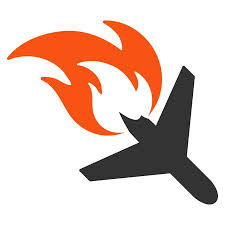


<h1 align=center><font size = 8> AIR CRASH ANALYSIS </font></h1>
<h1 align=center><font size = 2> BOEING VS AIRBUS</font></h1>


## Introduction <a name="introduction"></a>

In our day to day life we encounter several accidents. Accidents may happen on road, water and air. However, Air accidents cause severe damages and brings more risks for whom travel by air. 

Statistically, air travel is safer than other source but when something goes wrong during air travel, it can be catastrophic with hundreds of lives at stake.

Since there are plenty of aircrafts, **Boeing and Airbus** are considered for this study. 
Boeing and Airbus are the most powerful commercial jets in the world. Even these aircraft manufacturers have different types of aircrafts with lots of safety measurements, Accidents are been reported every year. When there is a 0% reported air accidents over the certain period, it can be considered as 100% growth in aircraft technology.

From **1990 to 2020**, there were many major accidents happened due to many reasons. In this analysis, The Cause of the accident, damages, Airlines and other facts are been analyzed. From the analyzed data, Safest airlines and aircrafts can be found using data science.


## Data

First we have to give the credit to the source of the data,
* Accident data source - aviation-safety.net
* Aircraft Registrations - Wikipedia.com
 
we decided to analysis the accident rates between boeign and airbus, accident rates between each types of aircraft, locations where accident happend, reason for the accident and airlines.

We used,
* geocoder to get loction address,latitude and longitude. 
* Folium to point the places in the map.
* Foursuare to find near airport.

In [1]:
# The code was removed by Watson Studio for sharing.

,date,type,registration,operator,fat.,location,cat
0,2015-10-31 00:00:00,Airbus A321-231,EI-ETJ,Metrojet,224.0,Hasna,C1
1,2007-07-17 00:00:00,Airbus A320-233,PR-MBK,TAM Brasil,199.0,São Paulo,A1
2,2014-12-28 00:00:00,Airbus A320-216,PK-AXC,Indonesia AirAsia,162.0,Karimata Strait,A1
3,2010-07-28 00:00:00,Airbus A321-231,AP-BJB,Airblue,152.0,Islamabad-Be...,A1
4,2015-03-24 00:00:00,Airbus A320-211,D-AIPX,Germanwings,150.0,Prads-Haute-Bléone,C1


In [2]:
df_data_0['location'] = df_data_0['location'].astype(str)
loc = []

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

for index,row in df_data_0.iterrows():
    for location in df_data_0['location']:
        loc.append(location)
        

In [4]:
loc

['Hasna',
 'São Paulo',
 'Karimata Strait',
 'Islamabad-Be...',
 'Prads-Haute-Bléone',
 'البحرين',
 'Adler/Sochi ...',
 'Bangalore',
 'Strasbourg',
 'Egyptian coast',
 'Canet-Plage',
 'Tegucigalpa',
 'Warszawa',
 'Amman-Queen ...',
 'Mogadishu ',
 'Istanbul',
 'Hiroshima',
 'Tripoli ',
 'Windhoek',
 'Berlin-Schön...',
 'Las Vegas-Mc...',
 'Düsseldorf ',
 'Halifax-Stan...',
 'Charlotte',
 'Glasgow ',
 'Leipzig ',
 'Tripoli ',
 'Manila',
 'Roma',
 'Davao City',
 'Varna ',
 'London',
 'Seoul',
 'Lyon Saint',
 'Melbourn',
 'Deauville',
 'Yangon',
 'Yangon',
 'München',
 'Philadelphia…',
 'Kulob',
 'Jaipur ',
 'London',
 'Roma,Italy',
 'Jakarta',
 'Larnaca',
 'Phoenix',
 'Istanbul',
 'Los Angeles ',
 'Macau ',
 'São Paulo',
 'Αθήνα, Δήμος Αθηναίων, Περιφερειακή Ενότητα Κεντρικού Τομέα Αθηνών, 10667, Ελλάδα',
 'Antalya ',
 'Billund ',
 'London',
 'Bristol',
 'Belfast',
 'New York',
 'Tripoli',
 'Amsterdam',
 'Frankfurt ',
 'San Francisco',
 'Orlando ',
 'Zhukovsky ',
 'Zhengzhou',
 'Murcia-S

In [6]:
lat =[]
lon = []
n=0
from geopy.exc import GeocoderTimedOut
for location in loc:
    n=n+1
    try:
        ad = geolocator.geocode(location)
        lat.append(ad.latitude)
        lon.append(ad.longitude)
        print(n,ad.address)
    except GeocoderTimedOut as e:
        
        try:
            ad = geolocator.geocode(location)
            lat.append(ad.latitude)
            lon.append(ad.longitude)
            print(n,ad.address)
        except GeocoderTimedOut as e:
        
            pass
    
    if (n==1280):
        break
    if (location == 'null'):
        ad = 'null'
        print(n,ad)

1 Hasna, Boulevard Mohammed V, El Hara, Guéliz ⴳⵉⵍⵉⵣ گليز, arrondissement de Guéliz كليز, Marrakech ⵎⵕⵕⴰⴽⵯⵛ مراكش, Pachalik de Marrakech, Préfecture de Marrakech عمالة مراكش, Marrakech-Safi ⵎⵕⵕⴰⴽⵛ-ⴰⵙⴼⵉ مراكش-أسفي, 40025, Maroc
2 São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil
3 Selat Karimata, Kepulauan Bangka Belitung, Indonesia
4 চট্টগ্রাম, চট্টগ্রাম জেলা, চট্টগ্রাম বিভাগ, 4000, Bangladesh
5 Prads-Haute-Bléone, Digne-les-Bains, Alpes-de-Haute-Provence, Provence-Alpes-Côte d'Azur, France métropolitaine, 04420, France
6 البحرين
7 Адлер, Адлерский внутригородской район, Сочи, городской округ Сочи, Краснодарский край, Южный федеральный округ, 354348, Россия
8 Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
9 Strasbourg, Bas-Rhin, Grand Est, France métropolitaine, France
10 Egyptian Theatre, South Broadway, Coos Bay, Coos County, Oregon, 97420, United States of America

In [5]:

body = client_c726bdedc2264ea684047edc84a829ed.get_object(Bucket='capstoneproject-donotdelete-pr-6j2hfdn4hr24h6',Key='latitude.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


df_lat = pd.read_csv(body,names = ['Latitude'])

df_lat.tail()

,Latitude
1276,22.3307998
1277,44.2196176
1278,26.1551249
1279,43.4253834
1280,​


In [6]:

body = client_c726bdedc2264ea684047edc84a829ed.get_object(Bucket='capstoneproject-donotdelete-pr-6j2hfdn4hr24h6',Key='longitude.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_long = pd.read_csv(body,names = ['Longitude'])

df_long.tail()

,Longitude
1275,109.145718
1276,91.841286
1277,6.442129
1278,50.534461
1279,39.923704


In [7]:
df_lat.drop(df_lat.tail(6).index,inplace=True)
df_long.drop(df_long.tail(5).index,inplace=True)

In [8]:
df_air =pd.concat([df_lat, df_long,df_data_0], axis=1, sort=False)

In [9]:
df_air

,Latitude,Longitude,date,type,registration,operator,fat.,location,cat
0,31.6311229,-8.006177,2015-10-31 00:00:00,Airbus A321-231,EI-ETJ,Metrojet,224.0,Hasna,C1
1,-23.5506507,-46.633382,2007-07-17 00:00:00,Airbus A320-233,PR-MBK,TAM Brasil,199.0,São Paulo,A1
2,-1.952487,109.145718,2014-12-28 00:00:00,Airbus A320-216,PK-AXC,Indonesia AirAsia,162.0,Karimata Strait,A1
3,22.3307998,91.841286,2010-07-28 00:00:00,Airbus A321-231,AP-BJB,Airblue,152.0,Islamabad-Be...,A1
4,44.2196176,6.442129,2015-03-24 00:00:00,Airbus A320-211,D-AIPX,Germanwings,150.0,Prads-Haute-Bléone,C1
5,26.1551249,50.534461,2000-08-23 00:00:00,Airbus A320-212,A4O-EK,Gulf Air,143.0,البحرين,A1
6,43.4253834,39.923704,2006-05-03 00:00:00,Airbus A320-211,EK32009,Armavia,113.0,Adler/Sochi ...,A1
7,12.9791198,77.591300,1990-02-14 00:00:00,Airbus A320-231,VT-EPN,Indian Airlines,92.0,Bangalore,A1
8,48.584614,7.750713,1992-01-20 00:00:00,Airbus A320-111,F-GGED,Air Inter,87.0,Strasbourg,A1
9,43.3667822,-124.213468,2016-05-19 00:00:00,Airbus A320-232,SU-GCC,EgyptAir,66.0,Egyptian coast,C1


In [10]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [175]:
df_air['Latitude'] = df_air['Latitude'].astype(float)
df_air['Longitude'] = df_air['Longitude'].astype(float)

In [18]:
import folium # map rendering library

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, airtype, location, date, airline in zip(df_air['Latitude'], df_air['Longitude'], df_air['type'], df_air['location'],df_air['date'],df_air['operator']):
    label = '{}, {}'.format(airtype, location,date, airline)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [176]:
df_air.dropna()

,Latitude,Longitude,date,type,registration,operator,fat.,location,cat
0,31.631123,-8.006177,2015-10-31 00:00:00,Airbus A321-231,EI-ETJ,Metrojet,224.0,Hasna,C1
1,-23.550651,-46.633382,2007-07-17 00:00:00,Airbus A320-233,PR-MBK,TAM Brasil,199.0,São Paulo,A1
2,-1.952487,109.145718,2014-12-28 00:00:00,Airbus A320-216,PK-AXC,Indonesia AirAsia,162.0,Karimata Strait,A1
3,22.330800,91.841286,2010-07-28 00:00:00,Airbus A321-231,AP-BJB,Airblue,152.0,Islamabad-Be...,A1
4,44.219618,6.442129,2015-03-24 00:00:00,Airbus A320-211,D-AIPX,Germanwings,150.0,Prads-Haute-Bléone,C1
5,26.155125,50.534461,2000-08-23 00:00:00,Airbus A320-212,A4O-EK,Gulf Air,143.0,البحرين,A1
6,43.425383,39.923704,2006-05-03 00:00:00,Airbus A320-211,EK32009,Armavia,113.0,Adler/Sochi ...,A1
7,12.979120,77.591300,1990-02-14 00:00:00,Airbus A320-231,VT-EPN,Indian Airlines,92.0,Bangalore,A1
8,48.584614,7.750713,1992-01-20 00:00:00,Airbus A320-111,F-GGED,Air Inter,87.0,Strasbourg,A1
9,43.366782,-124.213468,2016-05-19 00:00:00,Airbus A320-232,SU-GCC,EgyptAir,66.0,Egyptian coast,C1


In [177]:
df_air['type']=df_air['type'].astype(str)
A= df_air['type'].unique()
A[:10]

array(['Airbus A321-231', 'Airbus A320-233', 'Airbus A320-216',
       'Airbus A320-211', 'Airbus A320-212', 'Airbus A320-231',
       'Airbus A320-111', 'Airbus A320-232', 'Airbus A320',
       'Airbus A321-111'], dtype=object)

In [180]:
df_air['cat'].replace({"nan": "A1"}, inplace=True)
df_air['cat']=df_air['cat'].astype(str)
B= df_air['cat'].unique()
B[:10]

array(['C1', 'A1', 'H2', 'A2', 'O1', 'I2', 'C2', 'O2', 'H1'], dtype=object)

In [181]:
X= df_air[['type', 'cat']].values
X[:5]

array([['Airbus A321-231', 'C1'],
       ['Airbus A320-233', 'A1'],
       ['Airbus A320-216', 'A1'],
       ['Airbus A321-231', 'A1'],
       ['Airbus A320-211', 'C1']], dtype=object)

In [182]:
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(A)
X[:,0] =le_type.transform(X[:,0])
X[0:5]

array([[23, 'C1'],
       [16, 'A1'],
       [13, 'A1'],
       [23, 'A1'],
       [9, 'C1']], dtype=object)

In [183]:
le_cat = preprocessing.LabelEncoder()
le_cat.fit(B)
X[:,1] = le_cat.transform(X[:,1])
X[:5]

array([[23, 2],
       [16, 0],
       [13, 0],
       [23, 0],
       [9, 2]], dtype=object)

In [184]:
Y=df_air['fat.']

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

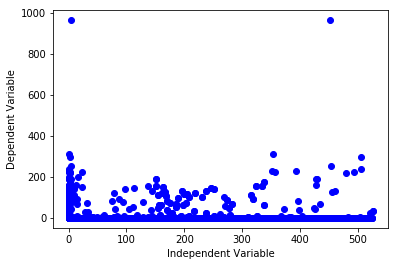

In [185]:
plt.plot(X,Y,'bo')

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()
